# World cup 2018 model

Importerer pakker

In [26]:
import pandas as pd
import pickle
import os
import itertools as it
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import HTML

import menon_styles



#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('float_format', '{:.2f}'.format)

ROOT_DIR = Path(os.environ.get('ROOT_DIR'))
DATA_DIR = ROOT_DIR / 'data'

In [27]:
menon_styles.menon_styles()

## En overskrift

In [28]:
from src.tournament import *
from src.empirical_models.elo import Elo, TeamElo
from src.empirical_models.regression import ConstantPar
from src.make_data import make_groups

In [29]:
e = Elo();
e.train();
#e.save()

In [30]:
#e = pickle.loads((DATA_DIR / 'models/elo_pickle.pkl').read_bytes())

In [19]:
wc_teams = list(it.chain.from_iterable(make_groups().values()))
df = e.teams_df[wc_teams]

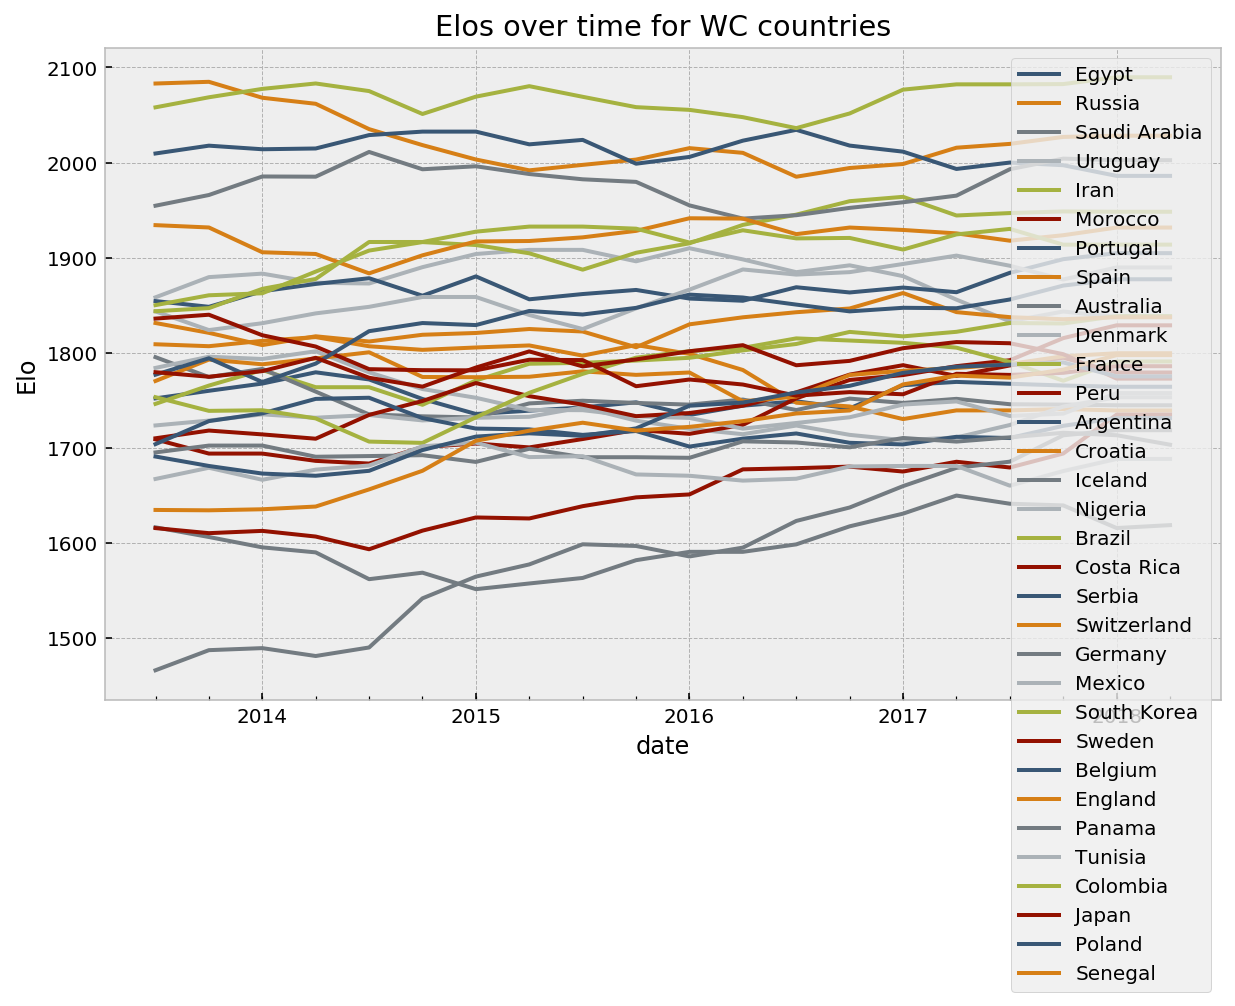

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
df.tail(20).plot(ax=ax, title='Elos over time for WC countries');
#ax.legend(frameon=False, loc='right', ncol=16)
ax.set_ylabel('Elo');

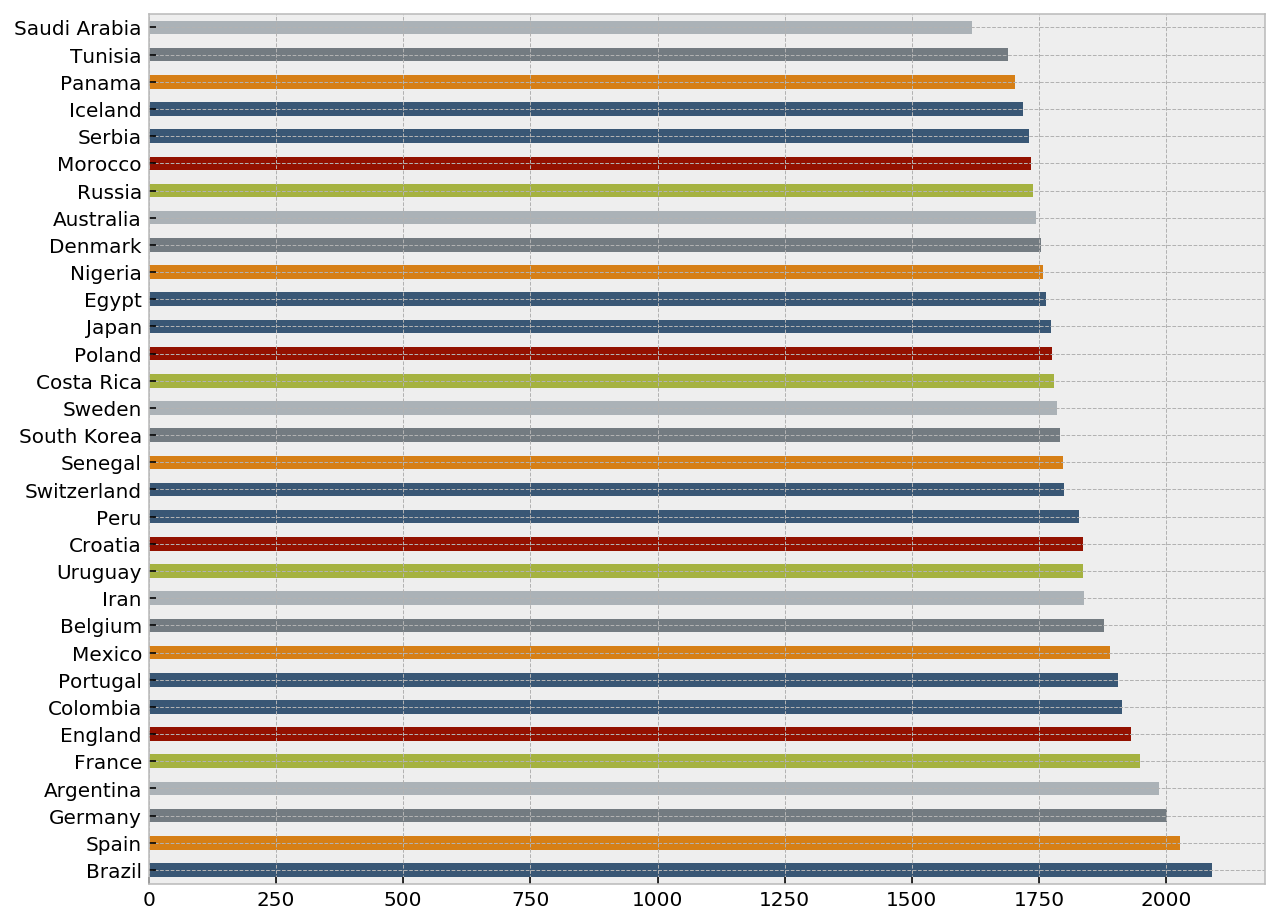

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
df.T[list(df.T)[-1]].sort_values(ascending=False).plot(kind='barh', ax=ax);

In [38]:
sim = Simulation([e], n=1000)

In [39]:
sim.style

,country,group,mean,std,min,25%,50%,75%,max,share wins,share top 4,share playoff
0,Argentina,D,8.982,7.39719,1,2,8,16,24,20%,43%,91%
1,Germany,F,10.574,7.77296,1,3,8,16,24,16%,34%,86%
2,Spain,B,10.545,8.77319,1,3,8,16,24,16%,42%,77%
3,England,G,9.395,7.64928,1,2,8,16,24,13%,45%,89%
4,France,C,10.896,7.87993,1,3,8,16,24,10%,31%,83%
5,Peru,C,17.142,8.23308,1,8,24,24,24,6%,16%,48%
6,Colombia,H,14.171,7.93995,1,8,16,24,24,4%,22%,73%
7,Portugal,B,15.517,8.91095,1,8,16,24,24,3%,23%,54%
8,Belgium,G,12.255,8.19433,1,4,8,16,24,3%,31%,77%
9,Croatia,D,14.842,7.6464,1,8,16,24,24,3%,12%,68%


In [40]:
sim.group

,country,group,mean,std,min,25%,50%,75%,max,share wins,share top 4,share playoff
0,Uruguay,A,15.862,6.9607,2,8,16,24,24,0%,12%,69%
1,Egypt,A,18.272,6.06125,3,16,16,24,24,0%,4%,55%
2,Russia,A,18.5,6.25757,3,16,16,24,24,0%,5%,51%
3,Saudi Arabia,A,21.392,4.80056,8,16,24,24,24,0%,0%,26%
4,Spain,B,10.545,8.77319,1,3,8,16,24,16%,42%,77%
5,Portugal,B,15.517,8.91095,1,8,16,24,24,3%,23%,54%
6,Iran,B,16.968,8.25076,1,8,24,24,24,2%,14%,48%
7,Morocco,B,21.432,5.51396,2,24,24,24,24,0%,4%,21%
8,France,C,10.896,7.87993,1,3,8,16,24,10%,31%,83%
9,Peru,C,17.142,8.23308,1,8,24,24,24,6%,16%,48%


In [ ]:
sim = Simulation([ConstantPar() for _ in range(5)], n=100)
sim.group

In [ ]:
sim.style